In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# อ่านไฟล์
df = pd.read_csv("./data/dynamic_record_gesture.csv")

print(df.head())

   id gesture_name  timestamp    ax    ay    az    gx    gy    gz    p0    p1  \
0   1         idle    1066413  0.01 -0.04  0.82 -0.42  0.41  0.16  4095  4095   
1   1         idle    1066425  0.02 -0.05  0.82  0.12  0.39  0.06  4095  4095   
2   1         idle    1066437  0.03 -0.03  0.81 -0.25  0.17 -0.25  4095  4095   
3   1         idle    1066449  0.04 -0.02  0.84  0.15  0.36  0.12  4095  4095   
4   1         idle    1066461  0.03 -0.02  0.83  0.25  0.10 -0.25  4095  4095   

     p2    p3  
0  4095  4095  
1  4095  4095  
2  4095  4095  
3  4095  4095  
4  4095  4095  


In [21]:
# =========================
# 2) Normalize (สำคัญ!)
# sensor สูง = งอ
# เราต้องกลับค่าให้ 1 = เหยียด
# =========================
SENSOR_MAX = 4095

for col in ["p0", "p1", "p2", "p3"]:
    df[col + "_norm"] = 1 - (df[col] / SENSOR_MAX)

print("Normalized preview (1=open, 0=closed)")
print(
    df.groupby("gesture_name")[["p0_norm","p1_norm","p2_norm","p3_norm"]]
    .mean()
)

Normalized preview (1=open, 0=closed)
               p0_norm   p1_norm   p2_norm   p3_norm
gesture_name                                        
1             0.048372  0.000342  0.000000  0.000000
2             0.043464  0.070318  0.000000  0.000000
3             0.029376  0.136921  0.059081  0.000000
4             0.076309  0.096232  0.060567  0.067159
idle          0.000000  0.000000  0.000000  0.000000


In [11]:
print(df["gesture_name"].unique())

<StringArray>
['idle', '1', '2', '3', '4']
Length: 5, dtype: str


In [22]:
print(df.groupby("gesture_name")[["p0","p1","p2","p3"]].mean())

                       p0           p1           p2           p3
gesture_name                                                    
1             3896.917037  4093.601481  4095.000000  4095.000000
2             3917.015873  3807.047619  4095.000000  4095.000000
3             3974.703557  3534.310277  3853.063241  4095.000000
4             3782.514793  3700.928994  3846.978304  3819.982249
idle          4095.000000  4095.000000  4095.000000  4095.000000


In [33]:
# =========================
# 3) Plot function
# =========================
def plot_hand(row):
    """
    Plot 3D hand from one dataframe row
    Assumption:
        p*_norm = 1 (open), 0 (closed)
    """

    # ---------- Config ----------
    FINGER_COLUMNS = ["p0_norm", "p1_norm", "p2_norm", "p3_norm"]
    FINGER_NAMES   = ["Index", "Middle", "Ring", "Pinky"]
    FINGER_X_POS   = [-1.2, -0.4, 0.4, 1.2]
    MAX_FINGER_LEN = 5

    # ---------- Create figure ----------
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection="3d")

    # ---------- Draw palm ----------
    ax.scatter(0, 0, 0, s=500)
    
    # ---------- Draw fingers ----------
    for col, name, x in zip(FINGER_COLUMNS, FINGER_NAMES, FINGER_X_POS):
        
        extension_ratio = row[col]           # 0 → closed, 1 → open
        finger_length   = extension_ratio * MAX_FINGER_LEN
        
        # finger line
        ax.plot([x, x], [0, 0], [0, finger_length])
        
        # finger label
        ax.text(x, 0, finger_length + 0.3, name)

    # ---------- Axis settings ----------
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, MAX_FINGER_LEN)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.set_title(
        f"Gesture: {row['gesture_name']}  |  Time: {row['timestamp']}"
    )

    plt.tight_layout()
    plt.show()


Selected Row:
Time: 1224021
Gesture: 3
Index: 0.03858363858363856
Middle: 0.09743589743589742
Ring: 0.06398046398046398
Pinky: 0.0


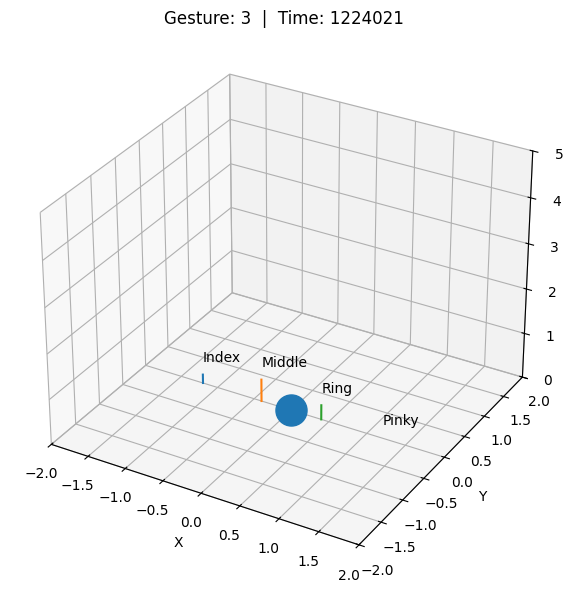

In [35]:
# ตัวอย่างดูแถวที่ 200
row = df.iloc[1500]

print("\nSelected Row:")
print("Time:", row["timestamp"])
print("Gesture:", row["gesture_name"])
print("Index:", row["p0_norm"])
print("Middle:", row["p1_norm"])
print("Ring:", row["p2_norm"])
print("Pinky:", row["p3_norm"])

plot_hand(row)